## Problem Statement:-

Use Clustering method to find the high credit score clusters of customers. It will summarise the existing loan scheme and help caltech bank to make decision about the new loan scheme.

In [1]:
#IMPORT REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')


In [2]:
loan = pd.read_csv('/content/drive/MyDrive/Datasets/Caltech_Bank-Customers.csv')
loan.head()

,Cust_id,Age,Earning,Credit Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [3]:
#Check for null values

loan.isnull().sum()

Cust_id         0
Age             0
Earning         0
Credit Score    0
dtype: int64

No null values in the dataset

In [4]:
loan.shape

(200, 4)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Cust_id       200 non-null    int64
 1   Age           200 non-null    int64
 2   Earning       200 non-null    int64
 3   Credit Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [6]:
# Segregate the columns to be clustered (Earning and Credit Score)

y = loan.iloc[:,[2,3]].values

Text(0, 0.5, 'Distance between samples')

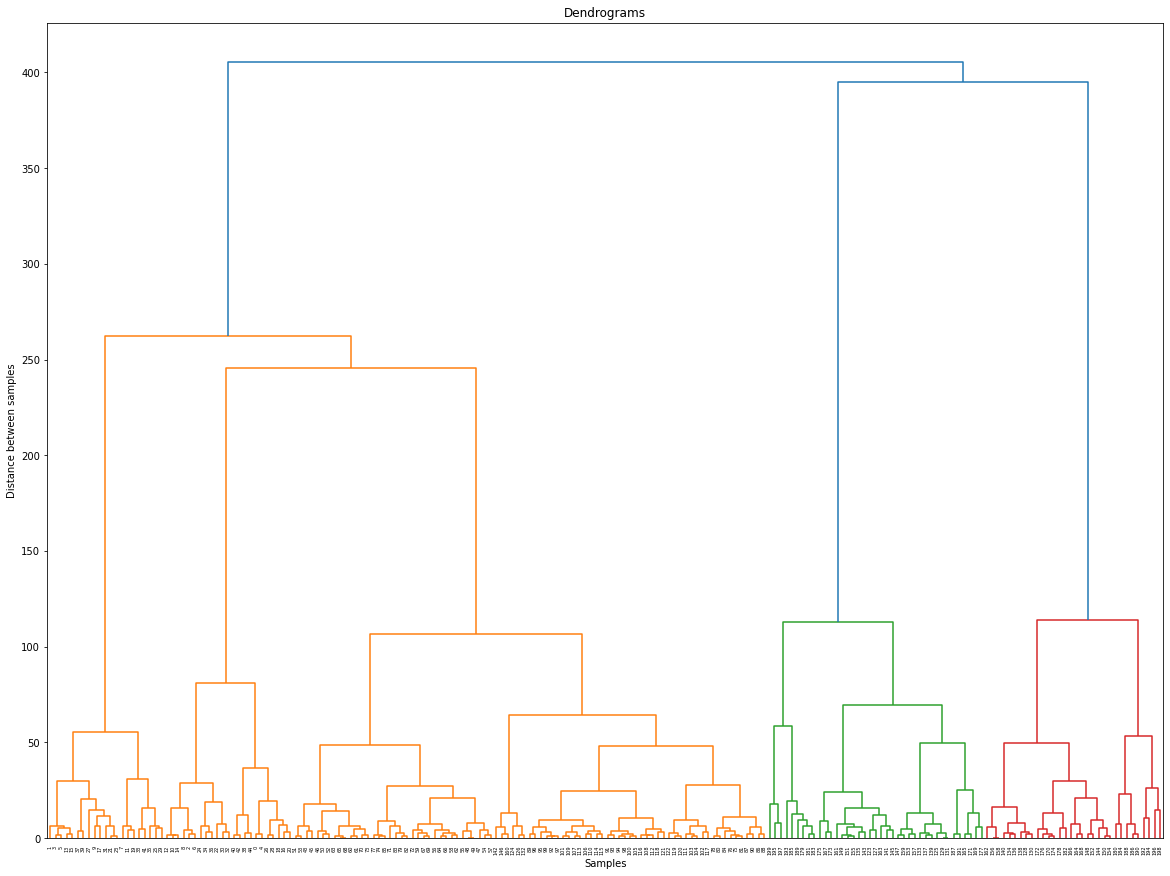

In [7]:
#Identify the number of clusters using Dendrogram

plt.figure(figsize=(20,15))
plt.title('Dendrograms')
dendrogram = shc.dendrogram(shc.linkage(y,method='ward'))
#ward is used to caluclate the distance between newly formed clusters
plt.xlabel('Samples')
plt.ylabel('Distance between samples')

From above, you can see that blue and green line has the maximum distance. We can select a threshold of 200 and the cut the dendrogram.



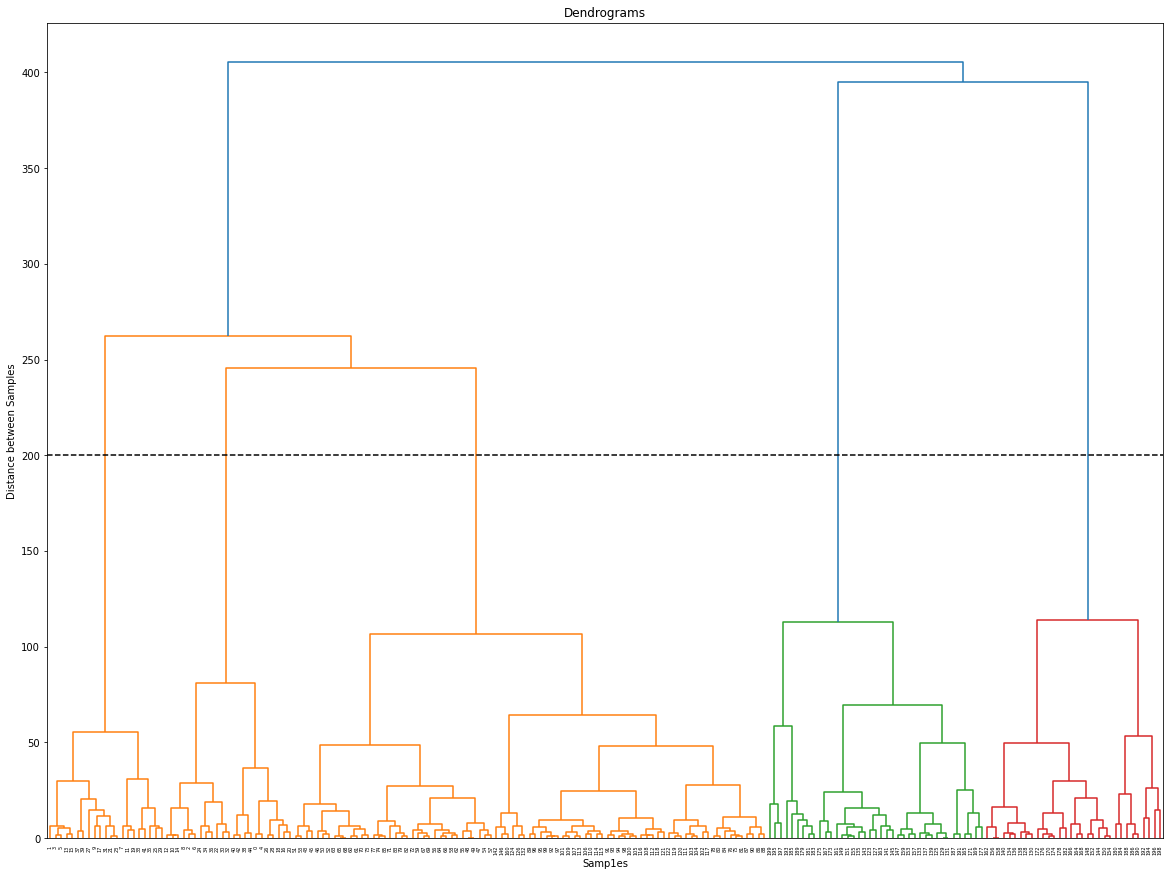

In [8]:
#Apply a threshold value to the above visualisation to find the clusters

plt.figure(figsize=(20,15)) 
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(y, method='ward'))
#ward is used to calculate distance between newly formed clu sters and can only be used with Euclidean Distance
plt.axhline(y=200, color='k', linestyle='--') 
plt.xlabel('Samp1es')
plt.ylabel('Distance between Samples') 
plt.show()

In [9]:
#Create, fit and predict hierarchical model with five clusters found by Dendrogram

h_clustering = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
h_clustering1 = h_clustering.fit_predict(y)

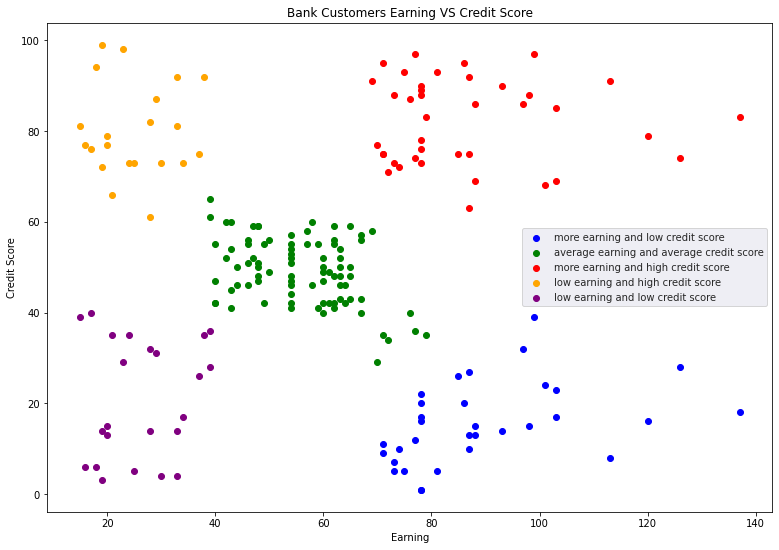

In [10]:
#Visualize customer based on their Earning and Credit Score

#Visualise the clusters using scatter plots

plt.scatter(y[h_clustering1==0,0],y[h_clustering1==0,1],color='blue',label='more earning and low credit score')
plt.scatter(y[h_clustering1==1,0],y[h_clustering1==1,1],color='green',label='average earning and average credit score')
plt.scatter(y[h_clustering1==2,0],y[h_clustering1==2,1],color='red',label='more earning and high credit score')
plt.scatter(y[h_clustering1==3,0],y[h_clustering1==3,1],color='orange',label='low earning and high credit score')
plt.scatter(y[h_clustering1==4,0],y[h_clustering1==4,1],color='purple',label='low earning and low credit score')

plt.title('Bank Customers Earning VS Credit Score')
fig = plt.gcf()
fig.set_size_inches(13,9)
sns.set_style('darkgrid')
plt.xlabel('Earning')
plt.ylabel('Credit Score')
plt.legend()
plt.show()



We have 5 clusters of customer based on Earning and Credit Score:


1. Cluster-1 (Blue): Customers of this group earn more but maintain a very low credit score.

2. Cluster-2 (Green): Customers of this group are earn average and maintain a decent credit score. Bank may consider them for the new loan scheme

3. Cluster-3 (Red): Customers of this group earn more and have a high credit score. Bank will surely consider them for the new loan scheme

4. Cluster-4 (Orange): These customers earn less but have a high credit score, seems like they repay their loan on time

5. Cluster-5 (Purple): These customers earn less and have a low credit score, they might not be eligible for the new loan scheme

